In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [7]:
df=pd.read_csv('D:\ml\exl\HR_comma_sep.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [8]:
left=df[df.left==1]
left

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [9]:
retain=df[df.left==0]

In [10]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


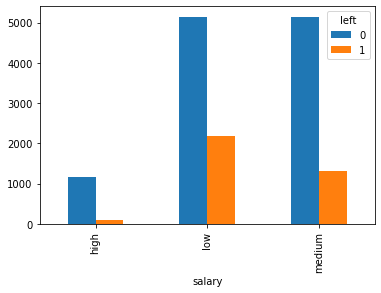

In [11]:
pd.crosstab(df.salary,df.left).plot(kind='bar')

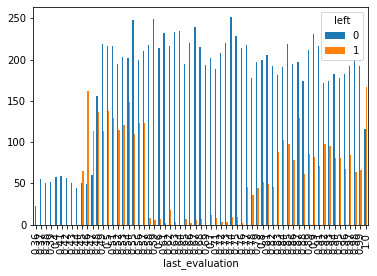

In [12]:
pd.crosstab(df.last_evaluation,df.left).plot(kind='bar')

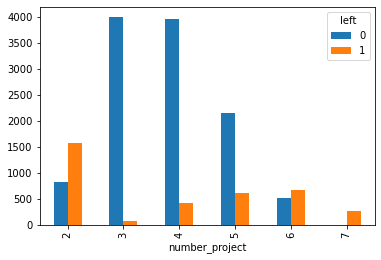

In [13]:
pd.crosstab(df.number_project,df.left).plot(kind='bar')

In [14]:
prd=df[['satisfaction_level','average_montly_hours','Work_accident','promotion_last_5years','salary']]
prd.head()

,satisfaction_level,average_montly_hours,Work_accident,promotion_last_5years,salary
0,0.38,157,0,0,low
1,0.80,262,0,0,medium
2,0.11,272,0,0,medium
3,0.72,223,0,0,low
4,0.37,159,0,0,low


In [15]:
d=pd.get_dummies(prd)
d.head()

,satisfaction_level,average_montly_hours,Work_accident,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,0,1,0
1,0.80,262,0,0,0,0,1
2,0.11,272,0,0,0,0,1
3,0.72,223,0,0,0,1,0
4,0.37,159,0,0,0,1,0


In [16]:
y=df.left
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split


In [18]:

X_train, X_test, y_train, y_test=train_test_split(d,y,train_size=0.9)


In [19]:
X_train

,satisfaction_level,average_montly_hours,Work_accident,promotion_last_5years,salary_high,salary_low,salary_medium
6730,0.17,286,1,0,0,1,0
11159,0.60,274,0,0,0,0,1
13760,0.73,189,1,0,0,0,1
2403,0.48,222,0,0,0,0,1
37,0.45,126,0,0,0,1,0
...,...,...,...,...,...,...,...
14581,0.37,142,0,0,0,1,0
2302,0.56,238,0,0,0,1,0
2499,0.13,181,0,0,0,1,0
10473,0.64,152,1,0,0,0,1


In [20]:
model=LogisticRegression()

In [21]:
model.fit(X_train,y_train)

C:\anconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [23]:
model.score(X_test,y_test)

0.786

In [24]:
yp= model.predict(X_test)

In [27]:
from sklearn.metrics import confusion_matrix
p=confusion_matrix(y_test,yp)

Text(69.0, 0.5, 'Truth')

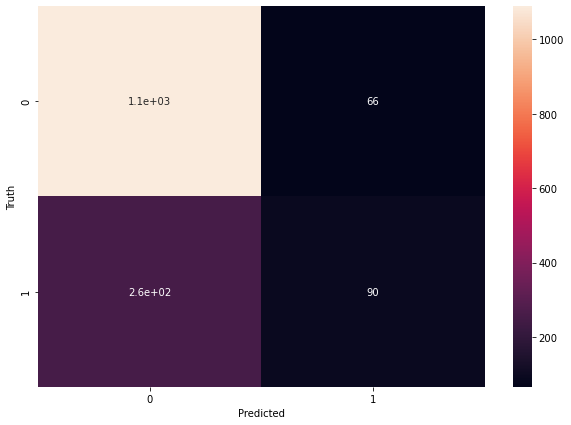

In [28]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(p, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')